# 1. Introducción

En este notebook modelaremos a 4 especies interacionando

Este es un modelo adaptado de dos modelos de ecuaciones diferenciales ya existentes:

1. Lotka-Volterra
2. Respuesta funcional tipo 1

**Referencias**

1. https://es.wikipedia.org/wiki/Ecuaciones_de_Lotka-Volterra
2. https://en.wikipedia.org/wiki/Mutualism_(biology)#cite_note-G-Alg-31



## 1.1 $x_1(t)$ → Depredador.

Cómo se comporta la población del depredador.

**Dependencias:**

1. $x_{1}(t)$ Su propie especie.
2. $x_{2}(t)$ La presa que depreda.


**Parámetros:**

* $\epsilon$ - Tasa de crecimiento del depredador.
* $\delta$ - Tasa de muerte del depredador.

$$
\dfrac{dx_1(t)}{dt} = \epsilon \cdot x_1(t) \cdot x_2(t)- \delta \cdot x_1(t)
$$

## 1.2 $x_2(t)$ → Presa (segundo depredador).

Cómo se comporta la población de la presa.

**Dependencias:**

1. $x_{2}(t)$ Su propia especie.
2. $x_{3}(t)$ La especie que depreda.

**Parámetros**

* $\eta$ - Tasa de crecimiento de la presa.
* $\xi$ - Tasa de muerte de la presa.

$$
\dfrac{dx_2(t)}{dt} = \eta \cdot x_{2}(t) \cdot x_{3}(t)-\xi \cdot x_{1}(t) \cdot x_{2}(t)
$$

## 1.3 $x_3(t)$ → Especie mutualista 1. (Depredado)

Cómo se comoporta la población de una especie en mutualismo.

**Dependencias:**
1. $x_{2}(t)$ La especie que lo depreda.
2. $x_{3}(t)$ Su propia especie.
3. $x_{4}$ La especie con la que recibe un beneficio mutualista.

**Parámetros**
* $r_1$ - Tasa de crecimiento de la especie mutualista 1.
* $\alpha_{11}$ Restricción por condición de hacinamiento.
* $\beta_{12}$ Benefició mutualista.
* $\sigma$ Tasa de muerte de la especie mutualista 1. (Depredación)

$$
\dfrac{dx_3(t)}{dt} = r_1 \cdot x_3(t) - \alpha_{11} \cdot x_3(t)^2 + \beta_{12} \cdot x_3(t) \cdot x_4(t) - \sigma \cdot x_2(t) \cdot x_3(t)
$$

## 1.4 $x_4(t)$ → Especie mutualista 2. (no depredada)

Cómo se comoporta la población de una especie en mutualismo.

**Dependencias:**
1. $x_{4}(t)$ Su propia especie.
2. $x_{3}(t)$ La especie con la que recibe un beneficio mutualista.

**Parámetros**
* $r_2$ - Tasa de crecimiento de la especie mutualista 1.
* $\alpha_{22}$ Restricción por condición de hacinamiento.
* $\beta_{21}$ Benefició mutualista.

$$
\dfrac{dx_4(t)}{dt} = r_2\cdot x_4(t) - \alpha_{22}(t) \cdot x_4(t)^2+ \beta_{21} \cdot x_3(t) \cdot x_4(t)
$$

# 2. Metodo de Euler para ecuaciones diferenciales.

El médodo de Euler sirve para resolver (aproximar) ecuaciones diferenciales ordinarias con condicion inicial. 

Teniendo en cuenta que:

$\dfrac{dy}{dx} = f(x_n,y_n)$

El método de Euler es:
$$ y_{n} = y_{n-1} + h \cdot f(x_{n-1},y_{n-1}) $$

## Ejemplo:

\begin{equation}
\begin{aligned}
 \dfrac{dy}{dx} &= \dfrac{\sin(x)}{y}\\

 y(0) &= 0
\end{aligned}
\end{equation}

**Solución Exacta:**

$$y = \sqrt{2(1-\cos(x))}$$ 

**Método de Euler:**

$$ y_{n} = y_{n-1} + h \cdot f(x_{n-1}, y_{n-1}) $$

$$x_0 = 0$$

$$y_0 = 0$$

$$f(x_0,y_0) = \dfrac{\sin(0)}{0}$$

Para evitar errores computacionales asumamos lo siguiente: $0 \approx \dfrac{1}{1 000 000}$

## 2.2 Implementación en código.

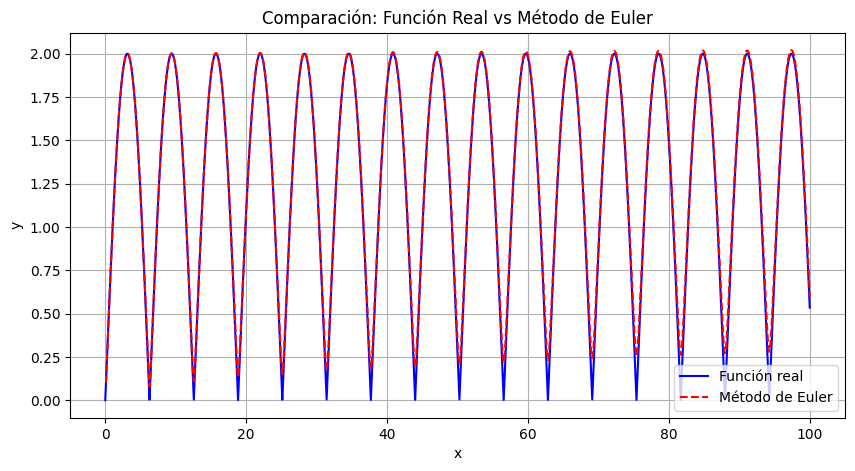

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def real_func(x):
    return np.sqrt(2*(1 - np.cos(x)))

def euler_method(x0, y0, h, n):
    x = x0
    y = y0
    x_list = [x]
    y_list = [y]
    for _ in range(n):
        # Evita división por cero añadiendo un épsilon a y
        epsilon = 1e-8
        y_deriv = np.sin(x) / (y + epsilon)
        y = y + h * y_deriv
        x = x + h
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

# Parámetros mejorados
x0 = 0.1  # Iniciar cerca de 0 para evitar la singularidad
y0 = real_func(x0)  # Valor real en x0
x_final = 100 # Reducir el intervalo para mejor visualización
n = 50000  # Aumentar el número de pasos
h = (x_final - x0)/n  # Paso más pequeño

# Graficar
interval = np.arange(0, x_final, 0.01)

plt.figure(figsize=(10,5))
plt.title("Comparación: Función Real vs Método de Euler")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(interval, real_func(interval), label="Función real", color='blue')

x_euler, y_euler = euler_method(x0, y0, h, n)
plt.plot(x_euler, y_euler, label="Método de Euler", linestyle='--', color='red')
plt.legend()
plt.grid(True)
plt.show()

# 3. Modelo de Interacción de 4 especies.

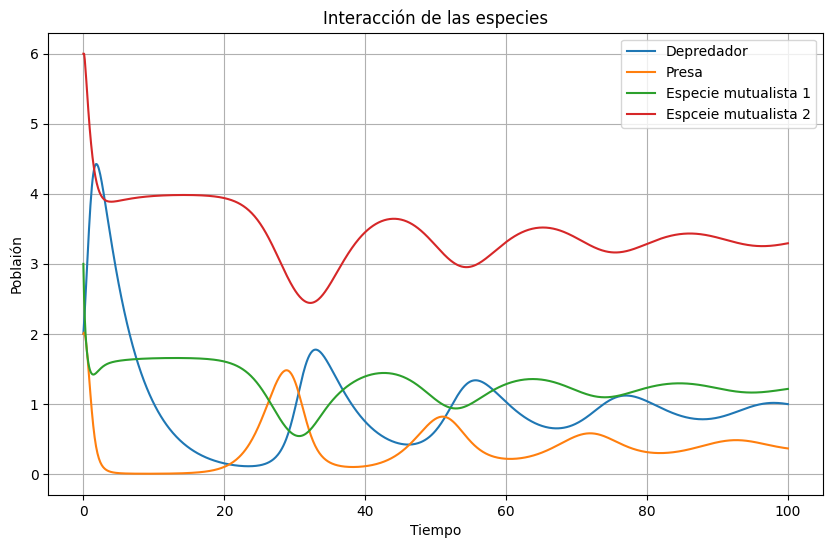

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros modificados
epsilon = 0.5
delta = 0.2
eta = 0.3
xi = 0.4
r1 = 0.3
alpha11 = 0.9
beta12 = 0.3
sigma = 0.5
r2 = 0.3
alpha22 = 0.2
beta21 = 0.3

# Define el sistema de ecuaciones diferenciales
def f(t, x):
    x1, x2, x3, x4 = x
    dx1_dt = epsilon * x1 * x2 - delta * x1
    dx2_dt = eta * x2 * x3 - xi * x1 * x2
    dx3_dt = r1 * x3 - alpha11 * x3**2 + beta12 * x3 * x4 - sigma * x2 * x3
    dx4_dt = r2 * x4 - alpha22 * x4**2 + beta21 * x3 * x4
    return np.array([dx1_dt, dx2_dt, dx3_dt, dx4_dt])

# Método de Euler para resolver ecuaciones diferenciales
def euler_method(f, t0, x0, h, n):
    
    t = t0
    x = x0

    t_values = [t]
    x_values = [x]

    for i in range(n):
        x = x + h * f(t, x)
        t = t + h
        t_values.append(t)
        x_values.append(x)
    return np.array(t_values), np.array(x_values)

# Condiciones iniciales
t0 = 0
x0 = np.array([2, 2, 3, 6])
t_final = 100
n = 1000
h = (t_final-t0)/n

# Resuelve el sistema utilizando el método de Euler
t_values, x_values = euler_method(f, t0, x0, h, n)

# Grafica las soluciones
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values[:, 0], label='Depredador')
plt.plot(t_values, x_values[:, 1], label='Presa')
plt.plot(t_values, x_values[:, 2], label='Especie mutualista 1')
plt.plot(t_values, x_values[:, 3], label='Espceie mutualista 2')
plt.xlabel('Tiempo')
plt.ylabel('Poblaión')
plt.title('Interacción de las especies')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
!streamlit run appV2.py

^C
